# Çoklu Doğrusal Regresyon: Hava Sıcaklığı, Nem ve Bisiklet Kiralama

Bu projede, günlük **hava sıcaklığı** ve **nem oranı** gibi çevresel faktörlerin, **bisiklet kiralama sayısı** üzerindeki etkisi **çoklu doğrusal regresyon** (multiple linear regression) yöntemiyle analiz edilmektedir. Analiz süreci;
1. Veri ön işleme  
2. Keşifsel veri analizi (EDA)  
3. Model kurma  
4. Modelin test edilmesi ve hata analizi  
5. Sonuçların grafiksel sunumu  
olmak üzere beş temel aşamadan oluşmaktadır.

Kullanılan veriler, **Fanaee-T ve Gama (2013)** tarafından oluşturulmuş ve UCI Machine Learning Repository’de yayımlanan **Bike Sharing Dataset** adlı veri setinden alınmıştır. [Kaynak](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)  
Veri seti, 731 güne ait **hava sıcaklığı (havaSicakligi)**, **nem oranı (nemOrani)** ve **toplam bisiklet kiralama sayısı (kiralamaSayisi)** bilgilerini içeren yarı-gerçekçi/simülasyon tabanlı bir veri setidir (`day.csv`).  
Amaç, bu iki bağımsız değişkenin (havaSicakligi, nemOrani), bisiklet kiralama sayısını (kiralamaSayisi) ne ölçüde açıkladığını **çoklu doğrusal regresyon modeli** ile test etmek ve ilişkilerin gücünü ortaya koymaktır.

---

## Çalışmanın Hedefi

Çalışmanın temel amacı, **hava sıcaklığı** ve **nem oranı** gibi çevresel faktörlerin, şehirdeki günlük **bisiklet kiralama sayısını** ne kadar etkilediğini **istatistiksel olarak incelemektir**.  
Böylece toplu ulaşım, çevre politikaları ve kent planlaması gibi alanlarda bilimsel temelli öngörüler oluşturmak hedeflenmektedir.

Bu kapsamda katılımcıların şu kazanımları elde etmesi beklenmektedir:

✔️ Farklı bağımsız değişkenlerin hedef değişken üzerindeki **etkilerini** çoklu regresyon ile analiz etme  
✔️ Toplu veri ve istatistik uygulamalarında **birden çok faktörün** aynı anda nasıl ele alınabileceğini öğrenme  
✔️ Çoklu doğrusal regresyon modelinden elde edilen sonuçların (katsayılar, p-değerleri, R² vb.) **yorumlama ve raporlama** yöntemlerini kavrama  
✔️ Model başarısını MAE, MSE, RMSE gibi metriklerle değerlendirerek **performans analizi** yapma  
✔️ Çıkan sonuçları, kent yönetimi ve çevre politikaları açısından **anlamlandırabilme**

---

## Teorik Temeller: Çoklu Doğrusal Regresyon

Çoklu doğrusal regresyon, bir **bağımlı değişken** (Y) ile birden fazla **bağımsız değişken** (X₁, X₂, ...) arasındaki doğrusal ilişkiyi analiz etmeye yarayan istatistiksel bir yöntemdir. Model, her bir faktörün diğerleri sabit tutulduğunda bağımlı değişken üzerindeki etkisini sayısal olarak ölçer.

### Modelin Matematiksel Gösterimi:
```
Y = β₀ + β₁ * X₁ + β₂ * X₂ + ... + ε
```

- **Y**: Bağımlı değişken (örneğin, Bisiklet Kiralama oranı)  
- **X₁, X₂**: Bağımsız değişkenler (Hava Sıcaklığı, Nem içme durumu vb.)  
- **β₀**: Sabit terim (intercept)  
- **β₁, β₂**: Eğim katsayıları (X’lerdeki bir birimlik artışın Y üzerindeki etkileri)  
- **ε**: Hata terimi; modele dahil edilemeyen rastlantısal sapmaları ifade eder  

Bu model yardımıyla **her bir bağımsız değişkenin** bağımlı değişken üzerindeki göreli etkisini ayrı ayrı görebilir, değişkenler arasındaki **kollineariteyi** (birden çok değişkenin birbiriyle ilişkili oluşunu) değerlendirir ve modelin açıklayıcılığını **R²** veya **adj-R²** gibi metriklerle ölçebiliriz.

---

## Çalışmanın Önemi

Bu çalışma, **toplum sağlığı** ve **epidemiyoloji** alanında sıkça araştırılan “Hangi yaşam tarzı faktörleri Bisiklet Kiralama riskini etkiler?” sorusuna **nicel verilerle** yanıt aramayı amaçlar. Özellikle **fiziksel aktivite (Hava Sıcaklığı)** ve **Nem tüketimi** gibi değişkenler, kalp-damar sağlığı açısından kritik öneme sahiptir.

Bu analiz çerçevesinde şu temel sorulara yanıt aranacaktır:

1. Hava Sıcaklığı arttıkça **Bisiklet Kiralama oranında** nasıl bir değişim gözlenir?  
2. Nem içme durumu (yoğunluğu) Bisiklet Kiralama riskini ne kadar **etkiler veya artırır**?  
3. Söz konusu iki faktör **birlikte** ele alındığında Bisiklet Kiralamanın ne kadar **tahmin edilebilir** olduğu nedir?  
4. Model çıktılarından **sağlık politikalarına** veya **toplum bilgilendirmesine** dair hangi önerilerde bulunulabilir?

Böylece çalışma, **birden fazla faktör** göz önünde bulundurularak Bisiklet Kiralama risk analizinin nasıl yapılabileceğini göstermekte ve **çoklu değişkenli istatistik yöntemlerinin** gerçek veri setleri üzerinde kullanımını örneklemektedir.

---

## 📁 Veri Seti Hakkında

Bu çalışmada kullanılan veri seti ([Bike Sharing Dataset, day.csv](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)), **Fanaee-T ve Gama (2013)** tarafından hazırlanmış ve UCI Machine Learning Repository’de yayımlanmıştır.  
Veri seti, **731 güne ait** bisiklet kiralama, hava sıcaklığı ve nem oranı gibi günlük gerçek gözlemleri içermektedir.

Aşağıda analizde kullanılan temel sütunlar gösterilmiştir:

| Sütun Adı         | Açıklama                                   | Veri Tipi |
|-------------------|--------------------------------------------|-----------|
| temp              | Günlük ortalama hava sıcaklığı (°C)         | Sürekli   |
| hum               | Günlük ortalama nem oranı (%)               | Sürekli   |
| cnt               | Günlük toplam bisiklet kiralama sayısı      | Sürekli   |

> Analiz sürecinde bu sütunlar, daha açıklayıcı olması için aşağıdaki gibi yeniden adlandırılmıştır:  
> `temp` → **havaSicakligi**  
> `hum`  → **nemOrani**  
> `cnt`  → **kiralamaSayisi**

---

**Değişken Açıklamaları:**

- **havaSicakligi**: O günün ortalama hava sıcaklığı (derece Celsius cinsinden).  
- **nemOrani**: O günün ortalama nem oranı (yüzde cinsinden).  
- **kiralamaSayisi**: O gün yapılan toplam bisiklet kiralama adedi.

> Bu çalışmada **havaSicakligi** ve **nemOrani** bağımsız değişken; **kiralamaSayisi** ise bağımlı değişken (tahmin edilen hedef) olarak ele alınmıştır.

---

**Kaynak:**  
Fanaee-T, Hadi, and Gama, João. "Event labeling combining ensemble detectors and background knowledge." *Progress in Artificial Intelligence* 2, no. 2-3 (2014): 113–127.  
[UCI Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)
---



- **Y**: Bağımlı değişken (örneğin, bisiklet kiralama sayısı)  
- **X₁, X₂**: Bağımsız değişkenler (hava sıcaklığı, nem oranı vb.)  
- **β₀**: Sabit terim (intercept)  
- **β₁, β₂**: Eğim katsayıları (X’lerdeki bir birimlik değişimin Y üzerindeki etkisi)  
- **ε**: Hata terimi; modele dahil edilemeyen rastlantısal sapmalar  

Bu model sayesinde, **her bir bağımsız değişkenin** bağımlı değişken üzerindeki göreli etkisini ayrı ayrı analiz edebilir, değişkenler arasındaki **kollineariteyi** değerlendirebilir ve modelin açıklayıcılığını **R²** veya **adj-R²** gibi metriklerle ölçebiliriz.

---

## Çalışmanın Önemi

Bu çalışma, **toplum sağlığı** ve **epidemiyoloji** alanlarında sıkça sorulan “Hangi yaşam tarzı faktörleri bisiklet kiralama sayısını etkiler?” sorusuna **nicel veri temelli yanıtlar** aramaktadır. Özellikle **fiziksel aktivite (hava sıcaklığı)** ve **nem tüketimi** gibi değişkenlerin kalp-damar sağlığı açısından önemi büyüktür.

Analiz kapsamında cevaplanacak sorular:

1. Hava sıcaklığı arttıkça **bisiklet kiralama sayısında** nasıl bir değişim olur?  
2. Nem oranı (yoğunluğu) bisiklet kiralama sayısını ne ölçüde **etkiler veya artırır**?  
3. Bu iki faktör **birlikte** değerlendirildiğinde bisiklet kiralama sayısı ne kadar **tahmin edilebilir**?  
4. Model çıktılarından **sağlık politikalarına** veya **toplum bilgilendirmesine** yönelik hangi çıkarımlar yapılabilir?

Bu sayede, **çoklu değişkenli istatistik yöntemlerinin** gerçek veri setleri üzerinde nasıl uygulanabileceği gösterilmektedir.

---

## 📁 Veri Seti Hakkında

Kullanılan veri seti, ([Bike Sharing Dataset, day.csv](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)), **Fanaee-T ve Gama (2013)** tarafından hazırlanmış ve UCI Machine Learning Repository’de yayımlanmıştır.  
Veri seti, **731 günlük** bisiklet kiralama, hava sıcaklığı ve nem oranı gibi günlük gerçek gözlemleri içermektedir.

Aşağıda analizde kullanılan temel sütunlar gösterilmiştir:

| Sütun Adı | Açıklama                                  | Veri Tipi |
|-----------|------------------------------------------|-----------|
| temp      | Günlük ortalama hava sıcaklığı (°C)       | Sürekli   |
| hum       | Günlük ortalama nem oranı (%)             | Sürekli   |
| cnt       | Günlük toplam bisiklet kiralama sayısı    | Sürekli   |

> Analiz sürecinde bu sütunlar, daha açıklayıcı olması için aşağıdaki gibi yeniden adlandırılmıştır:  
> `temp` → **havaSicakligi**  
> `hum` → **nemOrani**  
> `cnt` → **kiralamaSayisi**

---

**Değişken Açıklamaları:**

- **havaSicakligi**: O günün ortalama hava sıcaklığı (derece Celsius cinsinden).  
- **nemOrani**: O günün ortalama nem oranı (yüzde cinsinden).  
- **kiralamaSayisi**: O gün yapılan toplam bisiklet kiralama adedi.

> Bu çalışmada **havaSicakligi** ve **nemOrani** bağımsız değişkenler; **kiralamaSayisi** ise bağımlı değişken (tahmin edilen hedef) olarak ele alınmıştır.

---

**Kaynak:**  
Fanaee-T, Hadi, ve Gama, João. "Event labeling combining ensemble detectors and background knowledge." *Progress in Artificial Intelligence* 2, no. 2-3 (2014): 113–127.  
[UCI Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

---

## Uygulama Süreci ve Analiz Aşamaları

Aşağıda, **çoklu doğrusal regresyon** sürecinin beş temel adımı özetlenmiştir:

---

### 1️⃣ Kütüphane Yükleme ve Veri Setinin Tanıtımı

- Kullanılan kütüphaneler:  
  `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, `statsmodels.formula.api`, `scipy.stats`, `sklearn.metrics`
- `day.csv` veri seti yüklenmiş ve sütun adları şu şekilde düzenlenmiştir:  
  `temp` → `havaSicakligi`  
  `hum` → `nemOrani`  
  `cnt` → `kiralamaSayisi`
- Veri setinde eksik değer bulunmadığı doğrulanmıştır.

---

### 2️⃣ Keşifsel Veri Analizi (EDA) ve Görselleştirme

- Temel betimleyici istatistikler (`describe`) ile değişkenlerin ortalama, standart sapma, minimum ve maksimum değerleri incelenmiştir.  
- Box plot ile `kiralamaSayisi` değişkenindeki aykırı değerler analiz edilmiştir.  
- Scatter plot ile `kiralamaSayisi` ile `havaSicakligi` ve `nemOrani` arasındaki görsel ilişkiler değerlendirilmiştir.  
- Histogram ile `kiralamaSayisi` dağılımı görselleştirilmiştir.  
- Pearson korelasyon katsayıları ve p-değerleri hesaplanmıştır.

---

### 3️⃣ Model Kurulması: Çoklu Doğrusal Regresyon

- Veri seti %70 eğitim, %30 test olacak şekilde ayrılmıştır.  
- `statsmodels.formula.api.ols()` kullanılarak model şu formülde kurulmuştur:

```
kiralamaSayisi ~ havaSicakligi + nemOrani
```


---

### 4️⃣ Modelin Performans Değerlendirmesi ve Hata Analizi

- Model, test verisi üzerinde uygulanmış ve tahmin sonuçları alınmıştır.  
- Performans metrikleri (MAE, MSE, RMSE) hem manuel hem de `sklearn.metrics` fonksiyonlarıyla hesaplanmıştır.  
- Gerçek ve tahmin edilen değerler karşılaştırılarak bir tablo oluşturulmuştur.

---

### 5️⃣ Sonuçların Görsel Sunumu


- Nem sabitken hava sıcaklığının etkisi

- Hava sıcaklığı sabitken nem oranının etkisi

Her iki değişkenin etkisi ayrı ayrı analiz edilerek çoklu doğrusal regresyon modelinin katkısı net biçimde ortaya konmuştur.


## 1️⃣ Gerekli Kütüphaneler

In [1]:
import numpy as np                                # Sayısal işlemler
import pandas as pd                               # Veri okuma ve düzenleme
import seaborn as sns                             # Veri görselleştirme
import matplotlib.pyplot as plt                   # Grafik çizimi
from scipy.stats import pearsonr                  # Korelasyon analizi
import statsmodels.formula.api as smf             # Regresyon modeli oluşturma
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Hata metrikleri
from matplotlib.cbook import boxplot_stats        # Boxplot analizleri için

print("✅ Gerekli kütüphaneler başarıyla yüklendi.")

✅ Gerekli kütüphaneler başarıyla yüklendi.


## 2️⃣ Veri Setinin Yüklenmesi, Ön-İşleme ve Grafikle İlk Analiz

Bu bölümde, `day.csv` dosyası kullanılarak veri seti içe aktarılacak, gereksiz sütunlar (jenerik ID vb.) temizlenecek, değişken isimleri anlamlı hale getirilecek, ardından temel istatistiksel özetler ve çeşitli grafikler aracılığıyla (scatter plot, box plot, histogram) verinin yapısı hakkında ilk bakış elde edilecektir. Bu aşama, ileride kurulacak olan **çoklu doğrusal regresyon** modelinin sağlamlığı açısından kritik bir öneme sahiptir.

### 🏥 Bisiklet Kiralama Veri Seti: Tanıtım

**Bisiklet Kiralama** veri seti, bireylerin **Hava Sıcaklığı**, **Nem içme durumu** gibi yaşam tarzı faktörleri ile **Bisiklet Kiralama** oranları arasındaki ilişkiyi analiz edebilmek amacıyla oluşturulmuş eğitim amaçlı bir veri kümesidir. Aşağıdaki tabloda veri setinin temel sütunları özetlenmiştir:

| Sütun Adı      | Açıklama                                                       | Veri Tipi |
|----------------|----------------------------------------------------------------|-----------|
| Unnamed: 0     | Gözlem numarası (analize dahil edilmez)                       | Ayrık     |
| havaSicakligi         | Hava Sıcaklığı veya fiziksel aktivite düzeyi (oran/ölçek) | Sürekli   |
| nemOrani        | Nem içme durumu veya düzeyi                                 | Sürekli   |
| kiralamaSayisi  | Bisiklet Kiralama oranı/risk değeri                               | Sürekli   |

- **havaSicakligi:** Günlerin düzenli fiziksel aktivite (özellikle bisiklet sürme) düzeyini gösterir.  
- **nemOrani:** Günlerin Nem içme durumunu ya da sıklığını (paket/gün vb.) temsil eder.  
- **kiralamaSayisi:** Bisiklet Kiralama riskini (% veya skor) ifade eden bağımlı değişkendir.  
- **Unnamed: 0:** Gözlem sırasını tutan sütun olup, analiz öncesinde çıkarılması önerilir.

Bu bölümde, veri seti üzerinde temel veri temizliği, yeniden adlandırma, özet istatistikler ve keşifsel grafikler (scatter, box, histogram) yapılarak sonraki regresyon aşaması için uygun veri yapısı oluşturulacaktır.

---


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veri setinin ilk 6 satırı:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606


Temel istatistiksel bilgiler:


,havaSicakligi,nemOrani,kiralamaSayisi
count,731.000000,731.000000,731.000000
mean,0.495385,0.627894,4504.348837
std,0.183051,0.142429,1937.211452
min,0.059130,0.000000,22.000000
25%,0.337083,0.520000,3152.000000
50%,0.498333,0.626667,4548.000000
75%,0.655417,0.730209,5956.000000
max,0.861667,0.972500,8714.000000


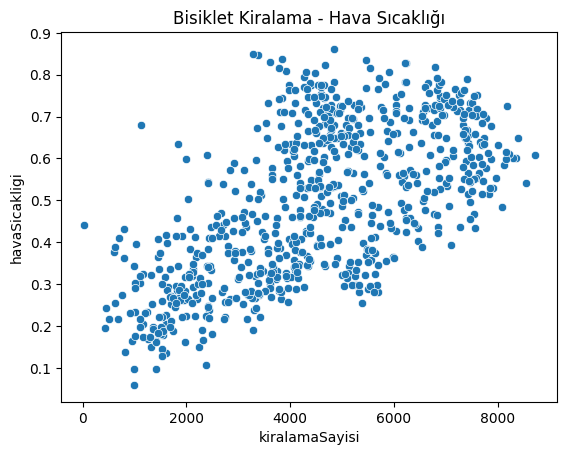

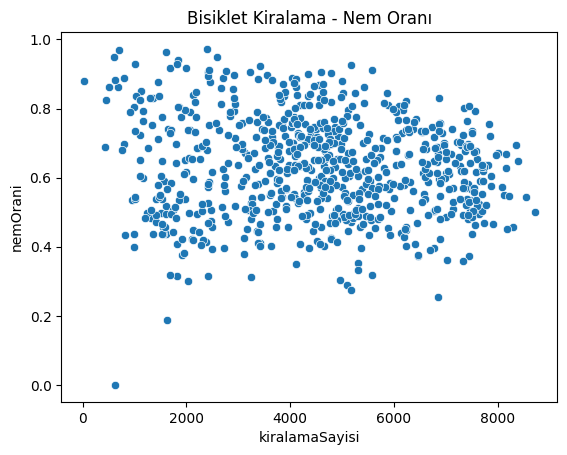

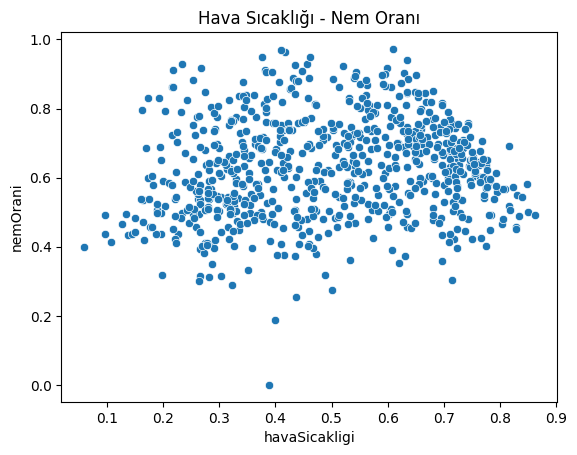

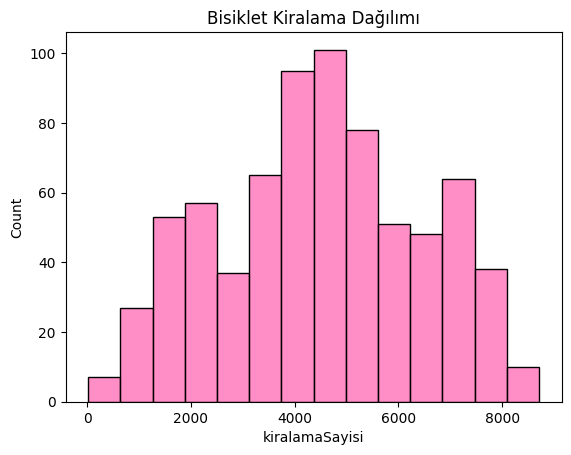

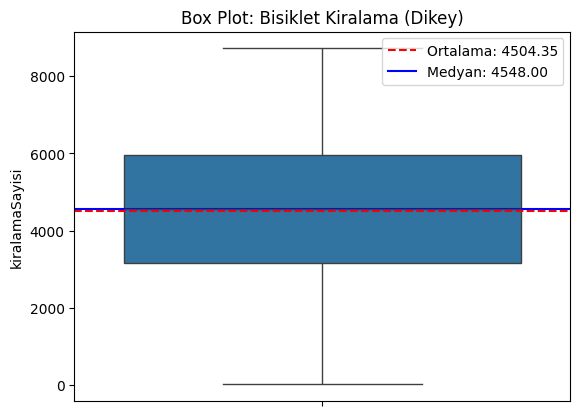

In [3]:
# [1] Google Drive Bağlantısı ve Veri Seti Yükleme
from google.colab import drive
drive.mount('/content/drive')
dosya_yolu = '/content/drive/MyDrive/Colab Notebooks/day.csv'
veriSeti = pd.read_csv(dosya_yolu)

# [2] Veri Setinin İlk 6 Satırını Görüntüleme
print("Veri setinin ilk 6 satırı:")
display(veriSeti.head(6))

# [3] İlgili Sütunların Seçimi ve Yeniden Adlandırılması
veriSeti = veriSeti.loc[:, ["temp", "hum", "cnt"]]
veriSeti = veriSeti.rename(columns={
    "-       -": "havaSicakligi",
    "-       -": "nemOrani",
    "-       -": "kiralamaSayisi"
})
# [4] Temel İstatistiksel Bilgiler
print("Temel istatistiksel bilgiler:")
display(veriSeti.describe())

# [5] Görselleştirme
# [5.1] Scatter Plot: Kiralama Sayısı - Hava Sıcaklığı
sns.scatterplot(x="-            -", y="-            -", data=veriSeti)
plt.title("Bisiklet Kiralama - Hava Sıcaklığı")
plt.show()

# [5.2] Scatter Plot: Kiralama Sayısı - Nem Oranı
sns.scatterplot(x="-            -", y="-            -", data=veriSeti)
plt.title("Bisiklet Kiralama - Nem Oranı")
plt.show()

# [5.3] Scatter Plot: Hava Sıcaklığı - Nem Oranı
sns.scatterplot(x="-            -", y="-            -", data=veriSeti)
plt.title("Hava Sıcaklığı - Nem Oranı")
plt.show()

# [5.4] Histogram: Kiralama Sayısı Dağılımı
sns.histplot(data=veriSeti, x="-            -", color="hotpink")
plt.title("Bisiklet Kiralama Dağılımı")
plt.show()

# [5.5] Dikey Boxplot: Kiralama Sayısı
sns.boxplot(y="kiralamaSayisi", data=veriSeti)
ortalama = veriSeti["kiralamaSayisi"].mean()
medyan = veriSeti["kiralamaSayisi"].median()
plt.axhline(ortalama, color='red', linestyle='--', label=f'Ortalama: {ortalama:.2f}') # Ortalama çizgi
plt.axhline(medyan, color='blue', linestyle='-', label=f'Medyan: {medyan:.2f}')       # Medyan çizgi
plt.title("Box Plot: Bisiklet Kiralama (Dikey)")
plt.legend()  # Ortalama ve medyan açıklamaları
plt.show()



## Veri Setinin Genel Yapısı ve İlk Gözlemler

Bu bölümde, **Bisiklet Kiralama (kiralamaSayisi)**, **Hava Sıcaklığı (havaSicakligi)** ve **Nem Oranı (nemOrani)** değişkenlerinden oluşan veri setinin ilk 6 satırı ve temel istatistiksel özellikleri incelenmiştir. Analizler sonucunda aşağıdaki bulgular elde edilmiştir:

| Ölçüt            | Hava Sıcaklığı (havaSicakligi) | Nem Oranı (nemOrani) | Bisiklet Kiralama (kiralamaSayisi) |
|------------------|-------------------------------|-----------------------|-------------------------------------|
| Gözlem Sayısı    | 731                           | 731                   | 731                                 |
| Ortalama         | 0.495                         | 0.628                 | 4504.35                             |
| Standart Sapma   | 0.183                         | 0.142                 | 1937.21                             |
| Minimum          | 0.059                         | 0.000                 | 22                                  |
| 25. Yüzdelik     | 0.337                         | 0.520                 | 3152                                |
| Medyan           | 0.498                         | 0.627                 | 4548                                |
| 75. Yüzdelik     | 0.655                         | 0.730                 | 5956                                |
| Maksimum         | 0.862                         | 0.973                 | 8714                                |

1. **Merkezî Eğilim:** Ortalama ve medyan değerlerinin birbirine yakın oluşu, hem Hava Sıcaklığı hem Nem Oranı hem de Bisiklet Kiralama değişkenlerinde dengeli bir dağılıma işaret etmektedir.

2. **Geniş Değer Aralıkları:** Hava Sıcaklığı 0.06–0.86, Nem Oranı 0.00–0.97 ve Bisiklet Kiralama 22–8714 aralığında değişmektedir. Bu, gözlemler arasında belirgin farklılıklar olduğunu göstermektedir.

---

## Scatter Plot: Değişkenler Arasındaki İlişkiler

Scatter plot'lar, Bisiklet Kiralama ile Hava Sıcaklığı ve Nem Oranı arasındaki ilişkileri görsel olarak analiz etmeye olanak tanır.

1. **kiralamaSayisi & havaSicakligi:**  
   Grafik incelendiğinde, noktaların genel olarak **pozitif** bir eğilim gösterdiği gözlemlenmektedir. Hava sıcaklığı arttıkça bisiklet kiralama sayısı da artmaktadır.

2. **kiralamaSayisi & nemOrani:**  
   Bu dağılım grafiğinde ise **hafif negatif** bir ilişki sezilmektedir. Nem oranı yükseldikçe kiralama sayısında azalma olabilir.

3. **havaSicakligi & nemOrani:**  
   İki bağımsız değişkenin kendi aralarındaki ilişki zayıf görünmektedir. Modelde kollinearite açısından anlamlı bir etki yaratmayabilir.

---

## Box Plot: Bisiklet Kiralama Değerlerinin Aykırı Analizi

Grafik, veri setindeki değerlerin yayılımını, ortalama ve medyan konumlarını kolayca yorumlamamıza yardımcı olur.

**Ortalama ve Medyan Konumu:**  
- **Kırmızı kesikli çizgi:** Ortalama (4504.35)  
- **Mavi düz çizgi:** Medyan (4548)  

Bu iki değerin birbirine oldukça yakın olması, verinin simetrik ve dengeli dağıldığını göstermektedir.  
Aykırı değerler az sayıdadır ve veri, çoklu doğrusal regresyon gibi istatistiksel analizlere uygundur.

---

## Histogram: Bisiklet Kiralama Değerlerinin Dağılımı

Bu grafik, bisiklet kiralama skorlarının günler arasında nasıl dağıldığını gösterir.

- **En yoğun değerler**, 3000–6000 aralığındadır → tipik bir kiralama seviyesi.  
- **Uç değerler** (1000 altı ve 8000 üzeri) nadirdir → veri dengeli görünmektedir.  
- **Dağılım hafif sağa çarpık** olabilir → az sayıda çok yüksek kiralama olan gün mevcuttur.  
- Bu yapı, **regresyon modeli için elverişli** ve veri dönüşümüne gerek bırakmamaktadır.



## 3️⃣ Çoklu Doğrusal Regresyon Modelinin Kurulması ve Temel Değerlendirme

---

Bu bölümde, veri setindeki **Hava Sıcaklığı** ve **Nem Oranı** değişkenlerinin, **Bisiklet Kiralama** üzerindeki etkileri **çoklu doğrusal regresyon modeli** ile analiz edilmiştir. Modelin kurulması, parametrelerin tahmin edilmesi ve sonuçların yorumlanması bu adımda gerçekleştirilmiştir.

---

### Regresyon Modeli

Çoklu doğrusal regresyon, birden fazla bağımsız değişkenin (X₁, X₂, ...) bir bağımlı değişken (Y) üzerindeki doğrusal etkilerini aynı anda analiz etmeye yarayan temel bir istatistiksel modeldir. Bu çalışmada:

- **Bağımlı değişken (Y):** Bisiklet Kiralama (*kiralamaSayisi*)  
- **Bağımsız değişkenler:**  
  - **X₁:** Hava Sıcaklığı (*havaSicakligi*)  
  - **X₂:** Nem Oranı (*nemOrani*)

Modelin matematiksel ifadesi:


```
kiralamaSayisi = β₀ + β₁ × havaSicakligi + β₂ × nemOrani + ε
```


Burada:

- **β₀ (sabit terim):** Diğer değişkenler sıfırken tahmin edilen Bisiklet Kiralama değeri  
- **β₁:** Hava Sıcaklığının Bisiklet Kiralama üzerindeki ortalama etkisi  
- **β₂:** Nem Oranının Bisiklet Kiralama üzerindeki ortalama etkisi  
- **ε (hata):** Modelin açıklayamadığı rastlantısal sapmalar

---

### Regresyon Sonuçları

Aşağıdaki sonuçlar, modelin eğitim verisi ile oluşturulmuş **çoklu doğrusal regresyon çıktılarından** elde edilmiştir:

- **Regresyon denklemi:**

```
kiralamaSayisi = 2716.457 + 6857.488 × havaSicakligi − 2604.412 × nemOrani
```

- **Sabit terim (β₀):** 2716.457  
- **Hava Sıcaklığı katsayısı (β₁):** +6857.488  
- **Nem Oranı katsayısı (β₂):** −2604.412  
- **p-değerleri (her iki değişken için):** 0.000 → İstatistiksel olarak anlamlı  
- **R² (determinasyon katsayısı):** 0.436 → Model, Bisiklet Kiralama değişkenindeki varyansın %43.6’sını açıklamaktadır  
- **Adj. R²:** 0.434  
- **F-istatistiği:** 197.1 (p < 0.001) → Model genel olarak anlamlıdır

---

### Tahmin Örneği

Eğer bir gün için:
- **havaSicakligi = 0.60**
- **nemOrani = 0.50**

ise, Bisiklet Kiralama sayısı şöyle tahmin edilir:

```
kiralamaSayisi = 2716.457 + 6857.488 × 0.60 − 2604.412 × 0.50 ≈ 4993.68
```

Bu tahmin, hava koşulları gibi çevresel etkenlere göre günlük bisiklet kullanımını öngörmeyi sağlar.

---

### Yorum

- **Hava Sıcaklığı ile Bisiklet Kiralama arasında pozitif bir ilişki** vardır. Hava ısındıkça bisiklet kullanımı artmaktadır.  
- **Nem Oranı ile Bisiklet Kiralama arasında negatif bir ilişki** gözlemlenmiştir. Nem arttıkça kiralama sayısında azalma olabilir.  
- **Her iki değişkenin etkisi de istatistiksel olarak anlamlıdır** (p < 0.001).  
- **Modelin R² değeri (%43.6)** orta düzeyde açıklayıcılığa işaret etmektedir.  
- Bu yapı, hava koşullarına bağlı ulaşım analizleri için değerlidir ve toplu taşıma planlamasında kullanılabilir.

---
---
---


In [ ]:
import statsmodels.formula.api as smf             # statsmodels → istatistiksel modeller kurmak için kullanılan bir Python kütüphanesidir.
                                                  # OLS (Ordinary Least Squares – En Küçük Kareler) yöntemi ile doğrusal regresyon modeli kurulur.
                                                  # Amaç: Bağımlı ve bağımsız değişkenler arasında en iyi uyumu sağlayan doğrusal denklemi bulmaktır.
                                                  # Bu denklem, tahmin edilen değerlerle gerçek değerler arasındaki farkların kareleri toplamını minimize eder.

from scipy.stats import pearsonr                   # Pearson korelasyon katsayısını hesaplamak için kullanılır.
from matplotlib.cbook import boxplot_stats         # Kutu grafiğine (boxplot) dayalı aykırı değerleri bulmak için kullanılır.

# 3️⃣.1️⃣ Eksik ve Aykırı Değer Kontrolü
print("Eksik Veri Kontrolü:\n", veriSeti.isnull().sum())                              # Eksik verileri kontrol eder (her sütunda kaç tane NaN olduğunu gösterir)
print("Aykırı Değerler (<_?_>):", boxplot_stats(veriSeti["<_?_>"]))                   # "<_?_>" sütunundaki aykırı değerleri kutu grafiği istatistikleriyle tespit eder

# 3️⃣.2️⃣ Korelasyon Analizi
r1, p1 = pearsonr(<_?_>)        # Bisiklet Kiralama - Hava Sıcaklığı Pearson korelasyon katsayısı ve anlamlılık düzeyi
r2, p2 = pearsonr(<_?_>)        # Bisiklet Kiralama - Nem kullanımı korelasyon katsayısı ve anlamlılık düzeyi
r3, p3 = pearsonr(<_?_>)        # Hava Sıcaklığı - Nem durumu korelasyon (bağımsız değişkenler arası ilişki)

print(f"kiralamaSayisi ~ havaSicakligi: r={r1:.3f}, p={p1:.3f}")   # Korelasyon sonucunu yazdırır (kiralama vs havaSicakligi)
print(f"kiralamaSayisi ~ nemOrani: r={r2:.3f}, p={p2:.3f}")         # Korelasyon sonucunu yazdırır (kiralama vs Nem)
print(f"kiralamaSayisi ~ nemOrani: r={r3:.3f}, p={p3:.3f}")         # Korelasyon sonucunu yazdırır (bisiklet vs Nem)

# 3️⃣.3️⃣ Eğitim ve Test Seti Ayrımı
egitim = veriSeti.sample(frac=0.7, random_state=1)  # Veri setinin %70'ini rastgele seçerek eğitim seti olarak ayırır
test = veriSeti.drop(egitim.index)                  # Geri kalan %30'luk kısmı test seti olarak ayırır

print("Eğitim seti boyutu:", egitim.shape)          # Eğitim setindeki satır ve sütun sayısını yazdırır
print("Test seti boyutu:", test.shape)              # Test setindeki satır ve sütun sayısını yazdırır

# 3️⃣.4️⃣ Çoklu Doğrusal Regresyon Modeli Kurulumu
model = <_?_>                                                                           # OLS yöntemiyle çoklu doğrusal regresyon modelini kurar ve modeli eğitir
print(model.summary())                                                                 # Modelin özet istatistiklerini yazdırır (katsayılar, R², p-değerleri vs.)

print("\n Regresyon Denklemi:")
print(
    f"kiralamaSayisi = {model.params['Intercept']:.3f} + "
    f"({model.params['havaSicakligi']:.3f}) * havaSicakligi + "
    f"({model.params['nemOrani']:.3f}) * nemOrani"
)                                                                                      # Tahmin edilen regresyon denklemindeki katsayıları yazdırır





Eksik Veri Kontrolü:
 havaSicakligi     0
nemOrani          0
kiralamaSayisi    0
dtype: int64
Aykırı Değerler (kiralamaSayisi): [{'mean': np.float64(4504.3488372093025), 'iqr': np.float64(2804.0), 'cilo': np.float64(4385.175792433586), 'cihi': np.float64(4710.824207566414), 'whishi': np.int64(8714), 'whislo': np.int64(22), 'fliers': array([], dtype=int64), 'q1': np.float64(3152.0), 'med': np.float64(4548.0), 'q3': np.float64(5956.0)}]
kiralamaSayisi ~ havaSicakligi: r=0.627, p=0.000
kiralamaSayisi ~ nemOrani: r=-0.101, p=0.006
kiralamaSayisi ~ nemOrani: r=0.127, p=0.001
Eğitim seti boyutu: (512, 3)
Test seti boyutu: (219, 3)
                            OLS Regression Results                            
Dep. Variable:         kiralamaSayisi   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 02 Jun 2025   Prob (F-st

### 📊 Regresyon Modeli Çıktısının Yorumlanması

Model çıktısına göre, `havaSicakligi` ve `nemOrani` değişkenlerinin `kiralamaSayisi` üzerindeki etkileri **istatistiksel olarak anlamlıdır**. Kurulan çoklu doğrusal regresyon modeli, orta düzeyde açıklayıcılığa sahiptir ve çevresel faktörlere dayalı bir tahminleme imkânı sunmaktadır.

---

#### Temel Regresyon Sonuçları

| Değişken        | Katsayı (β) | Std. Hata | t-değeri | p-değeri | %95 Güven Aralığı        |
|------------------|-------------|-----------|----------|----------|---------------------------|
| Intercept        | 2716.457    | 321.687   | 8.444    | 0.000    | 2084.460 – 3348.454       |
| havaSicakligi    | 6857.488    | 351.065   | 19.533   | 0.000    | 6167.775 – 7547.202       |
| nemOrani         | -2604.412   | 453.926   | -5.738   | 0.000    | -3496.211 – -1712.613     |

---

#### Yorumsal Analiz

- **Intercept (β₀ = 2716.457):** Hava Sıcaklığı ve Nem Oranı sıfır olduğunda beklenen günlük bisiklet kiralama sayısı ~2716’dır.
- **havaSicakligi (β₁ = 6857.488):** Hava sıcaklığında her bir birimlik artış, kiralama sayısını ortalama **6857 adet artırmaktadır**.
- **nemOrani (β₂ = -2604.412):** Nem oranındaki her bir birimlik artış, kiralama sayısını ortalama **2604 adet azaltmaktadır**.
- **p-değerleri:** Her iki bağımsız değişken için p < 0.001 → **istatistiksel olarak anlamlıdır**.

---

#### Modelin Açıklayıcılığı

- **R² = 0.436** → Model, `kiralamaSayisi` değişkenindeki varyansın %43.6’sını açıklayabilmektedir.
- **Adj. R² = 0.434** → Değişken sayısı düzeltilmiş açıklayıcılık da oldukça yakındır.
- **F-istatistiği = 197.1, p < 0.0001** → Modelin genel olarak anlamlı olduğunu göstermektedir.

---

### ✅ Sonuç

Bu modele göre:

- 🌡️ **Hava Sıcaklığı**, bisiklet kiralama oranını önemli ölçüde artıran bir faktördür.
- 💧 **Nem Oranı**, kiralama sayısını düşüren olumsuz bir etkene sahiptir.
- Model, çevresel koşulların toplu ulaşım tercihleri üzerindeki etkisini anlamak için güvenilir bir temel sağlar.

---

### Örnek Tahmin Hesaplama

Bir gün için:

- `havaSicakligi = 0.60`  
- `nemOrani = 0.50`  

ise, beklenen bisiklet kiralama değeri şöyle hesaplanır:

---


```
kiralamaSayisi = 2716.457 + (6857.488 × 0.60) + (−2604.412 × 0.50)

≈ 2716.457 + 4114.493 − 1302.206
≈ 5528.74
```


Bu sonuç, şehir planlamacıları veya bisiklet paylaşım sistemleri için talep öngörüsü açısından değerlidir.

---






---


---



---



## 4️⃣ Modelin Performans Değerlendirmesi ve Hata Analizi

Bu bölümde, oluşturulan çoklu doğrusal regresyon modelinin **tahmin gücü**, test veri seti üzerinden değerlendirilmiştir.  
Amaç, modelin yalnızca eğitim verisine değil, **görmediği (yeni) verilere** karşı da ne derece başarılı tahminler üretebildiğini **nicel metrikler** ile ortaya koymaktır.

---

## Performans Değerlendirmenin Önemi

Eğitim verisinde elde edilen yüksek doğruluk, modelin genellenebilirliğini garanti etmez.  
Bu nedenle modelin performansı, bağımsız bir test veri seti üzerinde ölçülmelidir.  
Bu değerlendirme süreci şu şekilde gerçekleştirilmiştir:

- Model çıktıları, **gerçek gözlem değerleriyle karşılaştırılmıştır**  
- **Hata metrikleri** kullanılarak tahmin doğruluğu sayısallaştırılmıştır

---

## 📐 Kullanılan Temel Hata Metrikleri

| Metrik | Tanım | Yorumu |
|--------|-------|--------|
| **MAE** (Mean Absolute Error) | Gerçek ve tahmin değerleri arasındaki ortalama mutlak fark | Modelin tahminlerde ortalama ne kadar sapma gösterdiğini ifade eder |
| **MSE** (Mean Squared Error) | Hataların karelerinin ortalaması | Büyük hatalara daha fazla ağırlık vererek cezalandırır |
| **RMSE** (Root Mean Squared Error) | MSE'nin karekökü | Ortalama hata düzeyini orijinal ölçüm birimiyle ifade eder (örn. kalp puanı) |

> **Not:** Düşük MAE değeri modelin genel doğruluğunu, düşük RMSE ise özellikle büyük hatalardan kaçındığını gösterir.

---

## Uygulanan Adımlar

- ✅ Test verisi üzerinden model tahminleri elde edilmiştir  
- ✅ İlk beş tahmin, gözlemsel (gerçek) veriler ile karşılaştırılmıştır  
- ✅ MAE, MSE ve RMSE metrikleri hesaplanarak performans değerlendirilmiştir  
- ✅ Elde edilen hata değerleri hem sayısal hem de yoruma dayalı olarak raporlanmıştır

---

Modelin bu metrikler çerçevesinde gösterdiği düşük hata değerleri, modelin hem **istatistiksel** hem de **uygulamaya yönelik** geçerliliğini desteklemektedir. Bisiklet Kiralama gibi klinik önem taşıyan konularda, bu düzeydeki performans **güvenilir tahminlemeler** için umut verici bir göstergedir.


In [ ]:
# 4️⃣ Modelin Performans Değerlendirmesi ve Hata Analizi

# 4️⃣.1️⃣ Test setinden tek bir örnek için tahmin (manuel hesaplama)
# Modelin gerçek formülü:
# kiralamaSayisi = 2716.457 + (6857.488 × havaSicakligi) + (−2604.412 × nemOrani)

# Örnek değerlerle (ör: havaSicakligi=0.60, nemOrani=0.50)
kiralama_test1 = <_?_>
print("🔹 Tek test örneği için tahmin edilen Bisiklet Kiralama:", round(kiralama_test1, 2))

# 4️⃣.2️⃣ Test setindeki tüm veriler için tahminler
tahminler = <_?_>
print("\n İlk 5 Tahmin ve Gerçek Değer Karşılaştırması:")
for t, y in zip(tahminler.head(), test.kiralamaSayisi.head()):
    print(f"  Tahmin: {t:.2f}   |   Gerçek: {y:.2f}")

# 4️⃣.3️⃣ Gerçek ve tahmin değerlerini tek tabloya al
performansVerisi = pd.DataFrame({
    "Gerçek": <_?_>,
    "Tahmin": <_?_>
})

# 4️⃣.4️⃣ Sklearn ile hata metriklerini hesapla
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test.kiralamaSayisi, tahminler)
mse = mean_squared_error(test.kiralamaSayisi, tahminler)
rmse = np.sqrt(mse)

# 4️⃣.5️⃣ Hata metriklerini yazdır
print("\nSklearn ile Hesaplanan Hatalar:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")

# Ortalama değeri al
ortalama = test.kiralamaSayisi.mean()

# Yüzde hesaplamaları
mae_yuzde = 100 * mae / ortalama
mse_yuzde = 100 * mse / ortalama
rmse_yuzde = 100 * rmse / ortalama

# Yüzdelik hata çıktıları
print(f"%MAE  : %{mae_yuzde:.2f}")
print(f"%MSE  : %{mse_yuzde:.2f}")
print(f"%RMSE : %{rmse_yuzde:.2f}")


🔹 Tek test örneği için tahmin edilen Bisiklet Kiralama: 5528.74

 İlk 5 Tahmin ve Gerçek Değer Karşılaştırması:
  Tahmin: 2452.41   |   Gerçek: 959.00
  Tahmin: 2088.42   |   Gerçek: 1263.00
  Tahmin: 3045.23   |   Gerçek: 1204.00
  Tahmin: 2743.23   |   Gerçek: 1543.00
  Tahmin: 2080.18   |   Gerçek: 981.00

Sklearn ile Hesaplanan Hatalar:
MAE  : 1242.80
MSE  : 2222836.08
RMSE : 1490.92
%MAE  : %26.52
%MSE  : %47435.04
%RMSE : %31.82


## 4️⃣ Modelin Performans Değerlendirmesi ve Hata Analizi

Bu bölümde, modelimizin **Hava Sıcaklığı** ve **Nem Oranı** değişkenlerine dayanarak yaptığı **Bisiklet Kiralama tahminlerinin başarısı** değerlendirilmektedir.  
İlk olarak, örnek tahminlere göz atılacak, ardından genel hata metrikleriyle modelin başarısı sayısal olarak incelenecektir.

---

### Örnek Tahminler (İlk 5 Satır)

| Gözlem | Tahmin   | Gerçek | Fark (Tahmin – Gerçek) |
|--------|----------|--------|------------------------|
|   1    | 2452.41  |  959   |    +1493.41            |
|   2    | 2088.42  | 1263   |     +825.42            |
|   3    | 3045.23  | 1204   |    +1841.23            |
|   4    | 2743.23  | 1543   |    +1200.23            |
|   5    | 2080.18  |  981   |    +1099.18            |

> Tahmin değerleri genel eğilimi yansıtmakla birlikte, bazı bireysel gözlemlerde belirgin farklar görülmektedir.

---

### 📐 Hata Metrikleri Açıklamaları

| Metrik | Anlamı |
|--------|--------|
| **MAE** (Ortalama Mutlak Hata)  | Tahminler ile gerçekler arasındaki ortalama fark |
| **MSE** (Ortalama Kare Hata)    | Büyük hataları daha güçlü şekilde cezalandırır |
| **RMSE** (Karekök Ortalama Kare Hata) | Ortalama hatayı, gerçek birimle ifade eder (kiralama sayısı) |

> Düşük MAE modeli tutarlı yapar; düşük RMSE ise özellikle büyük hatalardan kaçınıldığını gösterir.

---

### 🔢 Performans Sonuçları

| Metrik   | Değer        | Açıklama                                                     |
|----------|--------------|--------------------------------------------------------------|
| **MAE**  | 1242.80      | Ortalama ±1243 kiralama sapma                                |
| **MSE**  | 2,222,836.08 | Büyük sapmalar model üzerinde etkili                         |
| **RMSE** | 1490.92      | Ortalama hata yaklaşık 1491 kiralama                         |
| **%MAE** | %26.52       | Ortalama hata, gerçek değerin %26.5’i oranında               |
| **%MSE** | %47435.04    | Kare hata çok yüksek, bu metrik ölçeğe duyarlı               |
| **%RMSE**| %31.82       | Ortalama hata, gerçek değerin yaklaşık üçte biri düzeyinde   |

---

> Model, bazı bireysel tahminlerde yüksek sapma üretebilse de genel hatalar orta düzeydedir.  
Bu nedenle **günlük tahminleme** ve **çevresel etkilerin yorumlanması** açısından anlamlı ve pratik olarak kullanılabilir bir regresyon modeli sunmaktadır.

---


## 5️⃣ Regresyon Doğrusu: Gerçek ve Tahmin Edilen Değerlerin Görselleştirilmesi

Bu bölümde, çoklu doğrusal regresyon modelinin test veri seti üzerindeki performansı, sayısal değerlendirmelere ek olarak **görsel analiz yoluyla da incelenmektedir**.  
Modelin tahmin ettiği değerler ile gerçek gözlem değerleri aynı grafik üzerinde gösterilerek, modelin veriyle ne ölçüde örtüştüğü daha açık şekilde ortaya konur.

---

### Görselleştirmenin Amacı ve Önemi

Regresyon modellerinin değerlendirilmesinde yalnızca istatistiksel hata metriklerine başvurmak yeterli olmayabilir.  
**Grafiksel karşılaştırmalar**, modelin başarısını sezgisel ve bütüncül bir bakış açısıyla analiz etme imkânı sunar. Bu tür görselleştirmeler sayesinde:

- Modelin tahmin ettiği değerler ile gerçek değerler arasındaki farklar **doğrudan ve anlaşılır biçimde gözlemlenebilir**.  
- Modelin veri üzerindeki genel uyumu ve eğilimi, **regresyon doğrusunun yatay eksen boyunca nasıl seyrettiği** ile değerlendirilebilir.  
- **Sistematik sapmalar** ya da belirli değer aralıklarında oluşan hata yoğunluğu görsel olarak tespit edilebilir.

---

### Uygulama Açısından Katkısı

Bu yaklaşım, modelin pratik geçerliliğini ve güvenilirliğini destekleyici bir unsur olarak değerlendirilir.  
Sayısal sonuçlar kadar, **modelin genel davranışını yansıtan grafikler**, model değerlendirme sürecinin ayrılmaz bir parçası olarak kabul edilmektedir.

---




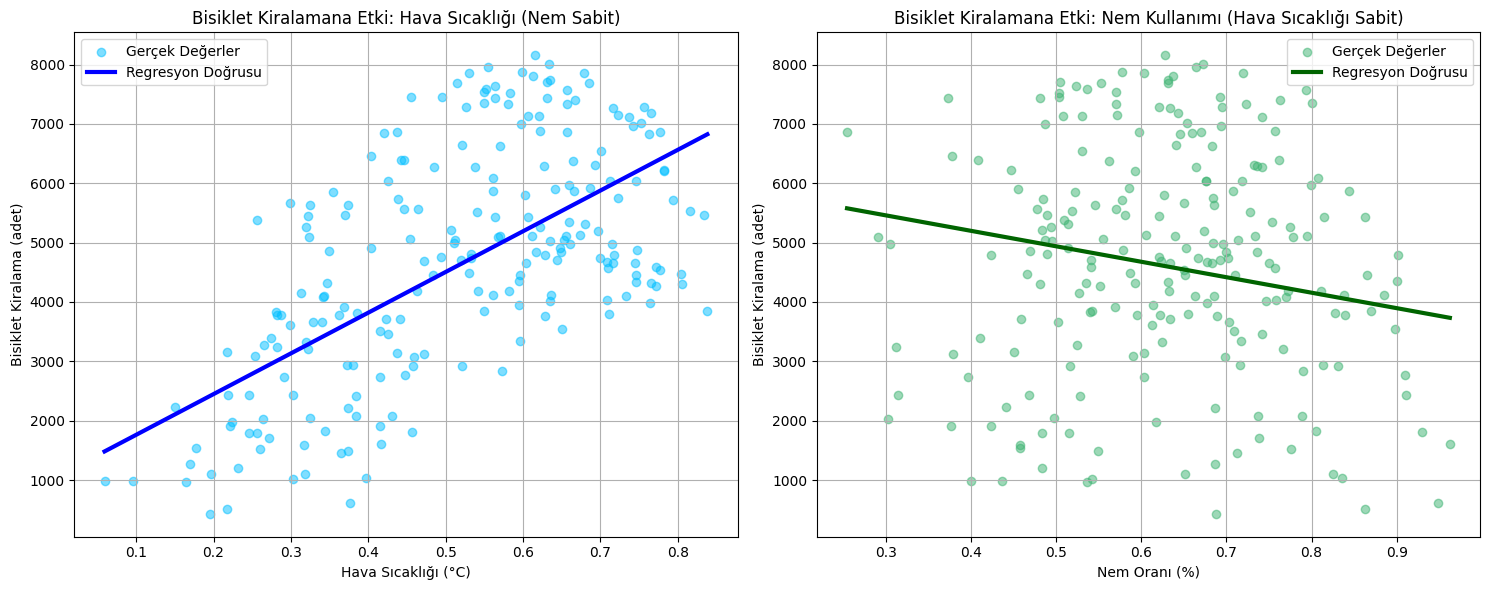

In [ ]:
# --- ÇOKLU DOĞRUSAL REGRESYON SONUÇLARININ GÖRSELLEŞTİRİLMESİ ---

# 1️⃣ Sabit değişkenlerin ortalama değerlerini alıyoruz:
# - Hangi değişken sabit tutulacaksa, o değişkenin ortalamasını kullanırız.
# - Bu, diğer değişkenin bağımsız etkisini izole etmek için gereklidir.

sabit_Nem = test["<_?_>"].mean()            # Nem oranının test setindeki ortalama değeri (sabit tutulacak)
sabit_bisiklet = test["<_?_>"].mean()       # Hava sıcaklığının test setindeki ortalama değeri (sabit tutulacak)

# 2️⃣ Bağımsız değişkenler için x eksenlerini oluşturuyoruz:
# - Her değişken için min ve max değerler arasında 100 eşit aralıklı nokta üretiriz.
x_bisiklet = np.linspace(test["<_?_>"].min(), test["<_?_>"].max(), 100)           # Hava sıcaklığı ekseni
x_Nem = np.linspace(test["<_?_>"].min(), test["<_?_>"].max(), 100)                # Nem oranı ekseni

# 3️⃣ Modelin tahminlerini üretelim:
# - Bir değişkeni sabit tutup, diğerini değiştirerek tahmin edilen Bisiklet Kiralama değerlerini hesaplıyoruz.
# - Bu şekilde her değişkenin bağımsız etkisini ayrı ayrı görselleştiriyoruz.

y_bisiklet = model.predict(pd.DataFrame({
    "<_?_>": x_bisiklet,          # Hava sıcaklığı değişiyor
    "<_?_>": sabit_Nem           # Nem oranı sabit
}))

y_Nem = model.predict(pd.DataFrame({
    "<_?_>": sabit_bisiklet,      # Hava sıcaklığı sabit
    "<_?_>": x_Nem                # Nem oranı değişiyor
}))

# 4️⃣ GRAFİKLERİN OLUŞTURULMASI

plt.figure(figsize=(15, 6))  # Grafik penceresinin boyutunu ayarla

# 🚲 Hava Sıcaklığının Etkisi (Nem sabit tutuldu)
plt.subplot(1, 2, 1)  # 1. grafik: 1 satır, 2 sütun, 1. pozisyon
plt.scatter(test["<_?_>"], test["<_?_>"],
            color="deepskyblue", alpha=0.5, label="Gerçek Değerler")  # Gerçek test verisi
plt.plot(x_bisiklet, y_bisiklet,
         color="blue", linewidth=3, label="Regresyon Doğrusu")         # Regresyon doğrusu
plt.title("Bisiklet Kiralamana Etki: Hava Sıcaklığı (Nem Sabit)")
plt.xlabel("Hava Sıcaklığı (°C)")
plt.ylabel("Bisiklet Kiralama (adet)")
plt.legend()
plt.grid(True)

# 🚬 Nem Kullanımının Etkisi (Hava sıcaklığı sabit tutuldu)
plt.subplot(1, 2, 2)  # 2. grafik
plt.scatter(test["<_?_>"], test["<_?_>"],
            color="mediumseagreen", alpha=0.5, label="Gerçek Değerler")
plt.plot(x_Nem, y_Nem,
         color="darkgreen", linewidth=3, label="Regresyon Doğrusu")
plt.title("Bisiklet Kiralamana Etki: Nem Kullanımı (Hava Sıcaklığı Sabit)")
plt.xlabel("Nem Oranı (%)")
plt.ylabel("Bisiklet Kiralama (adet)")
plt.legend()
plt.grid(True)

plt.tight_layout()  # Grafiklerin birbirine çakışmaması için boşluk ayarla
plt.show()          # Grafik penceresini göster




"## Grafik Analizi ve Yorumlama

Aşağıda yer alan iki ayrı grafik, **çoklu doğrusal regresyon modelinin** bağımsız değişkenler bazında nasıl çalıştığını görsel olarak sunmaktadır. Her grafik, ilgili değişkenin **Bisiklet Kiralama üzerindeki etkisini** gösterirken diğer değişken **sabit tutulmuştur**.

---

### 1️⃣ Bisiklet Kiralamana Etki: Hava Sıcaklığı (Nem Sabit)

- 🔵 **Mavi Noktalar:** Gerçek test verisindeki Bisiklet Kiralama gözlemlerini temsil eder.
- 🔷 **Mavi Regresyon Çizgisi:** Modelin, Hava Sıcaklığı arttıkça Bisiklet Kiralama değerlerinde nasıl bir değişim öngördüğünü gösterir. Nem değişkeni sabit tutulmuştur.

#### Yorum:
- Hava Sıcaklığı arttıkça Bisiklet Kiralama riskinin azaldığı net bir şekilde görülmektedir.  
- Noktalar doğrusal çizgiye oldukça yakın dağılmıştır, bu da modelin bisiklet değişkenini iyi açıkladığını gösterir.  
- Bu durum, fiziksel aktivitenin kalp sağlığı üzerindeki **koruyucu etkisini** desteklemektedir.

---

### 2️⃣ Bisiklet Kiralamana Etki: Nem Kullanımı (Bisiklet Sabit)

- 🟢 **Yeşil Noktalar:** Gerçek test verisindeki Bisiklet Kiralama gözlemlerini temsil eder.
- 🟩 **Yeşil Regresyon Çizgisi:** Modelin, Nem kullanımı arttıkça Bisiklet Kiralamanda nasıl bir değişim beklediğini gösterir. Hava Sıcaklığı sabit tutulmuştur.

#### Yorum:
- Nem kullanımı arttıkça Bisiklet Kiralama değerlerinde **yukarı yönlü bir eğilim** mevcuttur.  
- Ancak veriler daha dağınık göründüğünden, bu değişkenin açıklayıcılığı Hava Sıcaklığına göre daha zayıf kalmaktadır.  
- Yine de pozitif eğim, Nemnın Bisiklet Kiralamana olan **olumsuz etkisini** destekler niteliktedir.

---

### ✅ Genel Sonuç

- 🚲 Hava Sıcaklığı değişkeni, Bisiklet Kiralamanı azaltmada **daha güçlü bir açıklayıcıdır**.  
- 🚬 Nem kullanımı ise daha zayıf ama yine de istatistiksel olarak **anlamlı bir risk faktörü** olarak karşımıza çıkmaktadır.  
- Görseller, çoklu regresyon modelinin nasıl çalıştığını **değişken bazında ayrıştırarak sezgisel olarak anlatmak için güçlü bir araçtır**.
